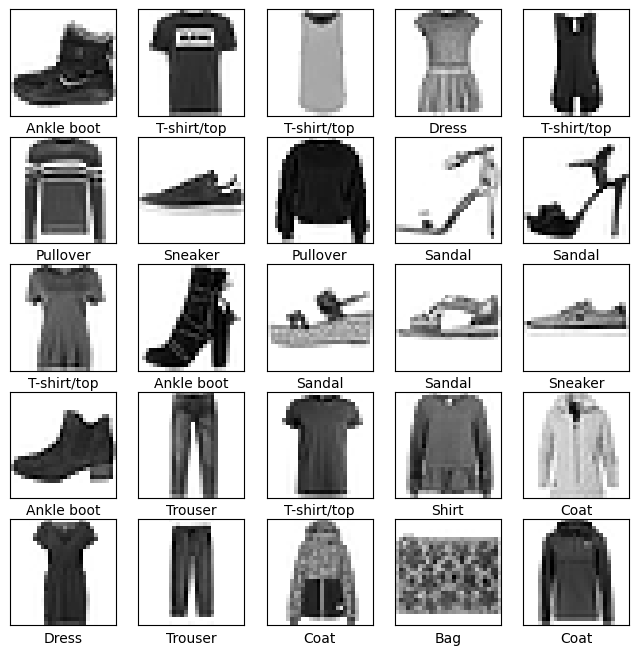

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
import warnings

# Ігнорування попереджень
import warnings
warnings.simplefilter('ignore', UserWarning)

# Завантаження датасету Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Масштабування значень зображень до діапазону 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Додавання додаткового виміру для каналів
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Аугментація даних
datagen = ImageDataGenerator(
    rotation_range=10,      # Випадкове обертання зображень на 10 градусів
    width_shift_range=0.1,  # Випадкове зміщення зображень по ширині на 10%
    height_shift_range=0.1, # Випадкове зміщення зображень по висоті на 10%
    shear_range=0.1,        # Випадкове зрізання зображень
    zoom_range=0.1,         # Випадкове збільшення/зменшення зображень
    horizontal_flip=False,  # Випадкове відображення зображень по горизонталі (не застосовується для Fashion MNIST)
    fill_mode='nearest'     # Заповнення нових пікселів найближчими
)

#datagen.fit(train_images)

# Перегляд прикладів зображень з датасету
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8, 8))  
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [37]:
# Створення моделі нейронної мережі з повнозв'язаними шарами
# Побудова моделі нейронної мережі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Компіляція моделі з вказаною швидкістю навчання
learning_rate = 0.005  # Встановіть бажану швидкість навчання
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Колбеки для ранньої зупинки і зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Тренування моделі з аугментацією даних
#history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
#                    epochs=50,
#                    validation_data=(test_images, test_labels),
#                    callbacks=[LearningRateLogger(), early_stopping, reduce_lr])


def schedule(epoch, lr):
    # Тут ви можете визначити будь-який розрахунок для швидкості навчання,
    # наприклад, зменшення швидкості навчання з кожною епохою
    return lr * 0.9

lr_scheduler = LearningRateScheduler(schedule)

epochs=50
# Тренування моделі
print('Тренування моделі')
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels), callbacks=[lr_scheduler])

# Тренування моделі
#history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))


# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nТестова точність:', test_acc)

Тренування моделі
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7541 - loss: 0.8815 - val_accuracy: 0.8208 - val_loss: 0.6135 - learning_rate: 0.0045
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8256 - loss: 0.5790 - val_accuracy: 0.8308 - val_loss: 0.5516 - learning_rate: 0.0040
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8324 - loss: 0.5393 - val_accuracy: 0.8214 - val_loss: 0.5716 - learning_rate: 0.0036
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8390 - loss: 0.5150 - val_accuracy: 0.8355 - val_loss: 0.5250 - learning_rate: 0.0033
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8462 - loss: 0.4953 - val_accuracy: 0.8328 - val_loss: 0.5363 - learning_rate: 0.0030
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8465 - loss: 0.4885 - val_accuracy: 0.8304 - val_loss: 0.5322 - learning_rate: 0.0027
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - ac

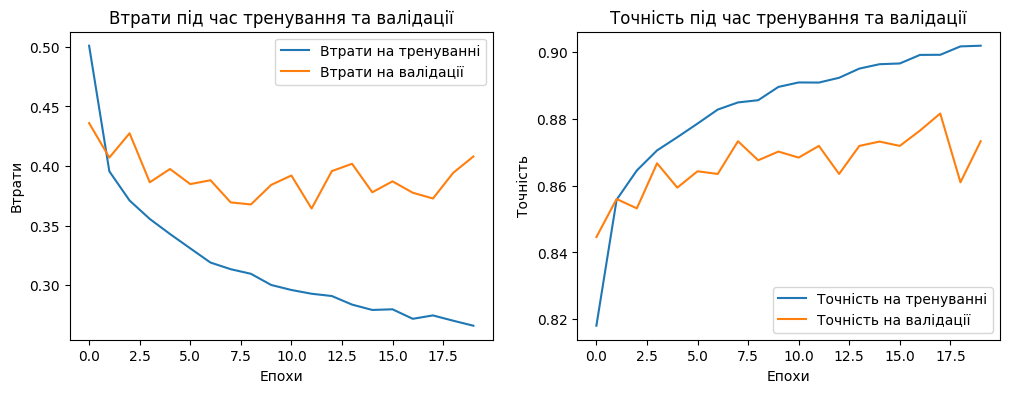

In [29]:
# Побудова графіків втрат та точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Втрати на тренуванні')
plt.plot(history.history['val_loss'], label='Втрати на валідації')
plt.title('Втрати під час тренування та валідації')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.title('Точність під час тренування та валідації')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()

plt.show()

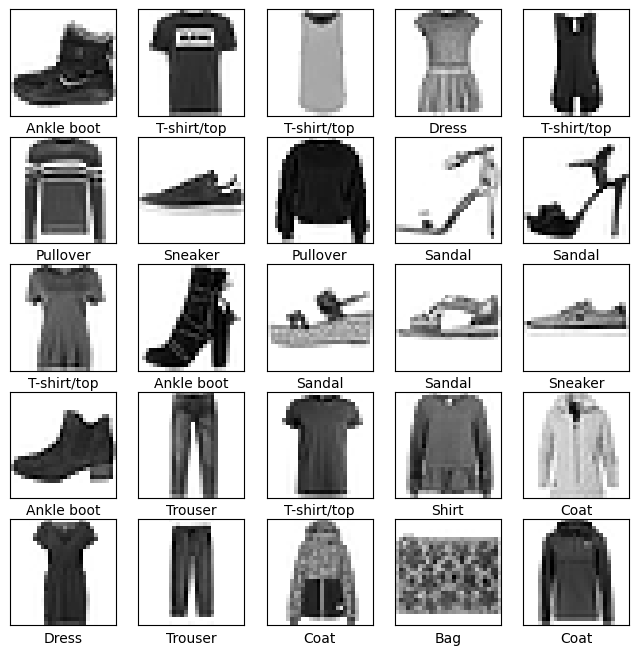

In [81]:
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import layers, models, callbacks
from tensorflow import keras

# Завантаження датасету Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Масштабування значень зображень до діапазону 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Додавання додаткового виміру для каналів
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Перегляд прикладів зображень з датасету
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8, 8))  
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [82]:
from tensorflow.keras.optimizers import Adam

class LearningRateLogger(callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate
        print(f'\nШвидкість навчання: {lr.numpy()}')

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))

    # Параметри, які потрібно оптимізувати
    hp_units = hp.Int('units', min_value=64, max_value=512, step=64)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
    model.add(layers.Dense(units=hp_units, activation='relu'))
    
    # Додамо кілька шарів, оптимізувати їх параметри
    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(layers.Dense(units=hp_units, activation='relu'))
        model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(10))

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

# Визначення та налаштування RandomSearch тюнера
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=8,
    executions_per_trial=5,
    directory='my_dir',
    project_name='fashion_mnist'
)

# Колбек для динамічної зміни швидкості навчання
def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.1

lr_scheduler = callbacks.LearningRateScheduler(lr_schedule)

# Пошук оптимальних гіперпараметрів
tuner.search(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[lr_scheduler])

model.summary()

# Виведення найкращих гіперпараметрів
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Найкращі гіперпараметри: {best_hps}")

# Побудова та тренування моделі з найкращими гіперпараметрами
model = tuner.hypermodel.build(best_hps)

# Додавання LearningRateLogger як колбеку до методу fit
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[LearningRateLogger()])

# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nТестова точність:', test_acc)

Reloading Tuner from my_dir\fashion_mnist\tuner0.json


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_27 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 288)                 │         226,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 288)                 │          83,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 288)                 │          83,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 10)                  │           2,890 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,186,304 (4.53 MB)

 Trainable params: 395,434 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 790,870 (3.02 MB)

Найкращі гіперпараметри: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x0000028BC873E840>

Швидкість навчання: 0.0010000000474974513
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7655 - loss: 0.6419 - val_accuracy: 0.8485 - val_loss: 0.4187

Швидкість навчання: 0.0010000000474974513
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8577 - loss: 0.3879 - val_accuracy: 0.8479 - val_loss: 0.4225

Швидкість навчання: 0.0010000000474974513
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8763 - loss: 0.3431 - val_accuracy: 0.8646 - val_loss: 0.3782

Швидкість навчання: 0.0010000000474974513
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8828 - loss: 0.3164 - val_accuracy: 0.8659 - val_loss: 0.3646

Швидкість навчання: 0.0010000000474974513
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8866 - loss: 0.3091 - val_accuracy: 0.8738 - val_loss: 0.3529

Швидкіс

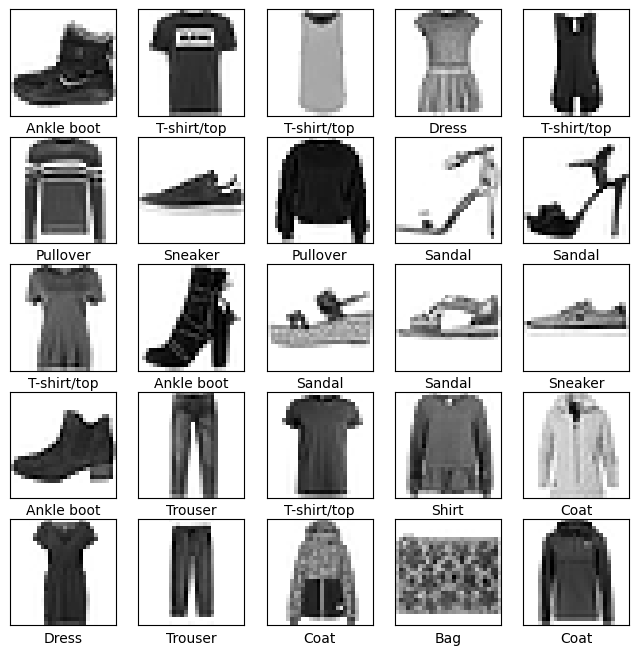

In [117]:
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import layers, models, callbacks
from tensorflow import keras
from tensorflow.keras.regularizers import l1_l2

# Завантаження датасету Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Масштабування значень зображень до діапазону 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Додавання додаткового виміру для каналів
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Перегляд прикладів зображень з датасету
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8, 8))  
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [118]:
from tensorflow.keras.optimizers import Adam

class LearningRateLogger(callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate
        print(f'\nШвидкість навчання: {lr.numpy()}')

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))

    # Параметри, які потрібно оптимізувати
    hp_units = hp.Int('units', min_value=64, max_value=512, step=64)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
    model.add(layers.Dense(units=hp_units, activation='relu'))
:
    model.add(layers.Dense(units=hp_units, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=hp_units, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10))

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

# Визначення та налаштування RandomSearch тюнера
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=8,
    executions_per_trial=5,
    directory='my_dir',
    project_name='fashion_mnist'
)

# Колбек для динамічної зміни швидкості навчання
def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.1

lr_scheduler = callbacks.LearningRateScheduler(lr_schedule)

# Пошук оптимальних гіперпараметрів
tuner.search(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[lr_scheduler])

model.summary()

# Виведення найкращих гіперпараметрів
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Найкращі гіперпараметри: {best_hps}")

# Побудова та тренування моделі з найкращими гіперпараметрами
model = tuner.hypermodel.build(best_hps)

# Додавання LearningRateLogger як колбеку до методу fit
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[LearningRateLogger()])

# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nТестова точність:', test_acc)

Reloading Tuner from my_dir\fashion_mnist\tuner0.json


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_46 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 288)                 │         226,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 288)                 │          83,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_83 (Dropout)                 │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 288)                 │          83,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_84 (Dropout)                 │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 10)                  │           2,890 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,186,304 (4.53 MB)

 Trainable params: 395,434 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 790,870 (3.02 MB)

Найкращі гіперпараметри: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x0000028C6B2D9520>

Швидкість навчання: 0.0010000000474974513
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7757 - loss: 0.6182 - val_accuracy: 0.8434 - val_loss: 0.4320

Швидкість навчання: 0.0010000000474974513
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8662 - loss: 0.3640 - val_accuracy: 0.8477 - val_loss: 0.4163

Швидкість навчання: 0.0010000000474974513
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8792 - loss: 0.3275 - val_accuracy: 0.8697 - val_loss: 0.3644

Швидкість навчання: 0.0010000000474974513
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8849 - loss: 0.3075 - val_accuracy: 0.8716 - val_loss: 0.3557

Швидкість навчання: 0.0010000000474974513
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8925 - loss: 0.2888 - val_accuracy: 0.8734 - val_loss: 0.3428

Швидкіс

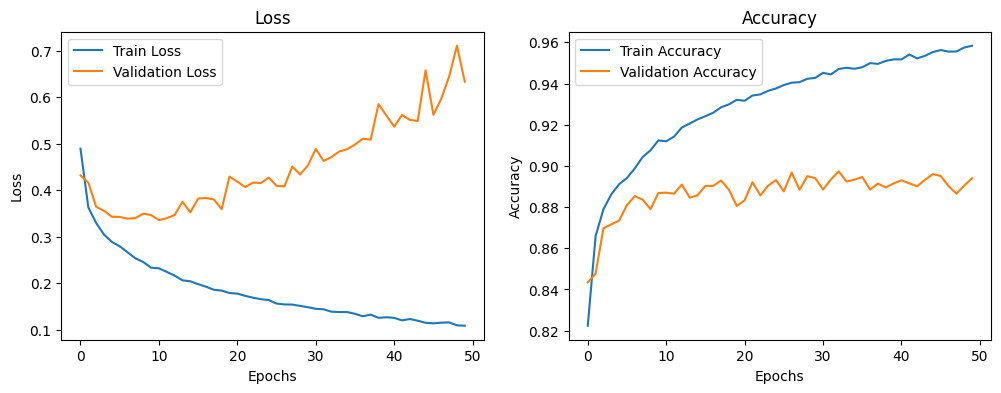

In [122]:
# Побудова графіків втрат та точності
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

plot_history(history)

In [125]:
# Прогнозування на тестових даних


y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
#y_true = np.argmax(test_labels, axis=1)
y_true = test_labels
# Класифікаційний звіт
print(classification_report(y_true, y_pred_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.84      0.79      0.81      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.83      0.82      0.82      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.69      0.76      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000

